<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Usage-of-sklearn:" data-toc-modified-id="Usage-of-sklearn:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Usage of sklearn:</a></span></li></ul></li><li><span><a href="#Question-1" data-toc-modified-id="Question-1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Question 1</a></span><ul class="toc-item"><li><span><a href="#Comments-(Question-1):" data-toc-modified-id="Comments-(Question-1):-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Comments (Question 1):</a></span></li></ul></li><li><span><a href="#Question-2" data-toc-modified-id="Question-2-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Question 2</a></span><ul class="toc-item"><li><span><a href="#Comments-(Question-2):" data-toc-modified-id="Comments-(Question-2):-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Comments (Question 2):</a></span></li></ul></li><li><span><a href="#Question-3" data-toc-modified-id="Question-3-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Question 3</a></span><ul class="toc-item"><li><span><a href="#Comments-(Question-3):" data-toc-modified-id="Comments-(Question-3):-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Comments (Question 3):</a></span></li></ul></li><li><span><a href="#Question-4" data-toc-modified-id="Question-4-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Question 4</a></span><ul class="toc-item"><li><span><a href="#Comments-(Question-4):" data-toc-modified-id="Comments-(Question-4):-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Comments (Question 4):</a></span></li></ul></li><li><span><a href="#Question-5" data-toc-modified-id="Question-5-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Question 5</a></span><ul class="toc-item"><li><span><a href="#Comments-(Question-5):" data-toc-modified-id="Comments-(Question-5):-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Comments (Question 5):</a></span></li></ul></li><li><span><a href="#Question-6" data-toc-modified-id="Question-6-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Question 6</a></span><ul class="toc-item"><li><span><a href="#Method-1:-Down-sampling-Max-of-(n-*-n)-matrix" data-toc-modified-id="Method-1:-Down-sampling-Max-of-(n-*-n)-matrix-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Method 1: Down sampling Max of (n * n) matrix</a></span><ul class="toc-item"><li><span><a href="#Comments-(Method-1):" data-toc-modified-id="Comments-(Method-1):-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Comments (Method 1):</a></span></li></ul></li><li><span><a href="#Method-2:-Principle-Component-Analysis" data-toc-modified-id="Method-2:-Principle-Component-Analysis-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Method 2: Principle Component Analysis</a></span></li><li><span><a href="#Method-3:-Canny-Edge-Detection" data-toc-modified-id="Method-3:-Canny-Edge-Detection-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Method 3: Canny Edge Detection</a></span></li></ul></li></ul></div>

# Introduction
This section gives introduction to the database as well as how to import, decode, and verify the database.

This section also include information about how and which functions of sklearn we are using for this assignemnt.

Also include some custom functions to plot confusion matrix and line plot.

Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#To read the dataset
import gzip

#To measure time of execution
from datetime import datetime
import timeit

from math import sqrt

#Sklearn functions for kNN
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#To plot the heatmap
import seaborn as sns

<b>About the MNIST database</b>

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

The data is stored in a very simple file format designed for storing vectors and multidimensional matrices. General info on this format is given at the end of this page, but you don't need to read that to use the data files.
All the integers in the files are stored in the MSB first (high endian) format used by most non-Intel processors. Users of Intel processors and other low-endian machines must flip the bytes of the header.

There are 4 files:

train-images-idx3-ubyte: training set images
train-labels-idx1-ubyte: training set labels
t10k-images-idx3-ubyte:  test set images
t10k-labels-idx1-ubyte:  test set labels

The training set contains 60000 examples, and the test set 10000 examples.

<b>Note</b>: You need to place above training and test data at the same location from where you are running this script.

<b>Read Images</b>: Following code unzip the .gz file and read image and label of training and test data.
Size of the all read data is printed to verify if all data is read correctly. 

train-images-idx3-ubyte.gz | imageData_Train | shape=(60000,784)

t10k-images-idx3-ubyte.gz  | imageData_Test  | shape=(10000,784)

In [2]:
nPixels = 28
nImages_Train = 60000
nImages_Test = 10000

#Train images read
fileUnzip = gzip.open('train-images-idx3-ubyte.gz','r')
fileUnzip.read(16)
imageBuff = fileUnzip.read(nPixels * nPixels * nImages_Train)
imageData = np.frombuffer(imageBuff, dtype=np.uint8).astype(np.float32)
imageData_Train = imageData.reshape(nImages_Train, nPixels**2)

#print image shape to make sure correct matrix is read
print("Shape of train image data: ", imageData_Train.shape)

#Test images read
fileUnzip = gzip.open('t10k-images-idx3-ubyte.gz','r')
fileUnzip.read(16)
imageBuff = fileUnzip.read(nPixels * nPixels * nImages_Test)
imageData = np.frombuffer(imageBuff, dtype=np.uint8).astype(np.float32)
imageData_Test = imageData.reshape(nImages_Test, nPixels**2)

#print image shape to make sure correct matrix is read
print("Shape of test image data: ", imageData_Test.shape)

Shape of train image data:  (60000, 784)
Shape of test image data:  (10000, 784)


<b>Read Labels</b>: Following code unzip the .gz file and read image and label of training and test data.
Size of the all read data is printed to verify if all data is read correctly. 

train-labels-idx1-ubyte.gz | classLabels_Train | shape=(60000,1)

t10k-labels-idx1-ubyte.gz  | classLabels_Test  | shape=(10000,1)

In [3]:
#Train label read
#read labels as column matrix
fUnzip2 = gzip.open('train-labels-idx1-ubyte.gz','r')
fUnzip2.read(8)
classBuff = fUnzip2.read(nImages_Train)
classLabels_Train = np.asmatrix(np.frombuffer(classBuff, dtype=np.uint8).astype(np.int64)).T
print("Shape of train data labels: ", classLabels_Train.shape)

#Test label read
#read labels as column matrix
fUnzip2 = gzip.open('t10k-labels-idx1-ubyte.gz','r')
fUnzip2.read(8)
classBuff = fUnzip2.read(nImages_Test)
classLabels_Test = np.asmatrix(np.frombuffer(classBuff, dtype=np.uint8).astype(np.int64)).T
print("Shape of test data labels: ", classLabels_Test.shape)

Shape of train data labels:  (60000, 1)
Shape of test data labels:  (10000, 1)


<b>Plot/Show Images</b>: Following code shows the 1 sample of image with it's label for train and test data.
From this plotting we confirm that data is read correctly and image can be reproduced from pixel values.

In [4]:
def ShowNumber(Data):
    sampleImage = np.asarray(Data.reshape(int(sqrt(Data.shape[0])),int(sqrt(Data.shape[0]))))
    plt.imshow(sampleImage,cmap = "bone_r")
    plt.show()
    
def ShowTrainImage(sample_number):
    print("Label - {}".format(classLabels_Train[sample_number,0]))    
    ShowNumber(imageData_Train[sample_number])

def ShowTestImage(sample_number):
    print("Label - {}".format(classLabels_Test[sample_number,0]))    
    ShowNumber(imageData_Test[sample_number])

Label - 8


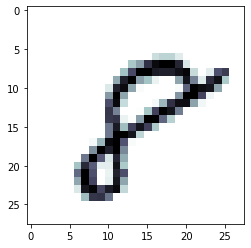

In [5]:
ShowTrainImage(nImages_Train-1)

Label - 7


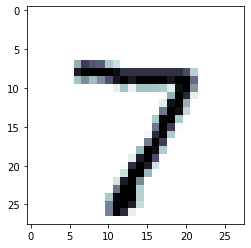

In [6]:
ShowTestImage(0)

<b>What is Confusion Matrix?</b>: 

In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa). The name stems from the fact that it makes it easy to see if the system is confusing two classes (i.e. commonly mislabeling one as another).

The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

We used <b>'confusion_matrix()'</b> function to get the matrix and function: <b>plot_confusion_matrix</b> to plot the confusion matrix. <b>Heatmap</b> is used to make it easy to understand.    

<b>What is heat map?</b>: 

A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors. The seaborn python package allows the creation of annotated heatmaps which can be tweaked using Matplotlib tools as per the creator’s requirement.

![](ConfusionMatrixWithoutNormalization.png)

In [7]:
def plot_confusion_matrix(lConfusionMatrix, title = "Confusion Matrix", width = 12, height = 9):
    
    pandas_df_confusion = pd.DataFrame(lConfusionMatrix, index=[p for p in range(10)], columns=[p for p in range(10)])
    plt.figure(figsize=(width,height))
    ax = sns.heatmap(pandas_df_confusion, annot=True, fmt = "d", cmap = sns.cubehelix_palette(), linewidths=.5)
    ax.set_title("ConfusionMatrix", fontsize = 20)
    ax.set_xlabel("Actual Value", fontsize = 20)
    ax.set_ylabel("Predicted Value", fontsize = 20)

    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()
    
    return

Function <b>"errorFromConfusionMatrix"</b> calculates the accuracy and error from confusion matrix. Returns the pandas dataframe so that user of this function can print it easily for anlysis. 

In [60]:
def errorFromConfusionMatrix(confusionMatrix):
    temparray = []
    for n in range(10):
        accuracy = np.sum(confusionMatrix[n,n])*100/np.sum(confusionMatrix[n,:])
        error = 100-accuracy
        temparray.append([n, accuracy, error])
        
    df = pd.DataFrame(temparray, range(10) ,['Digit', 'Accuracy', 'Error'])
    #df.style.apply(highlight_min, subset=['Error'])
    
    return df

Following is custom plot for this assignemnt.

In [9]:
def customPlot(ax, xdata, ydata, title=None, xlabel=None, ylabel=None, \
               legend= None, xlim=None, ylim=None, aspect=None, grid='off', fntSize=10):
    
    for k in range(len(ydata)):    
        ax.plot(xdata, ydata[k], 'ro')
        ax.plot(xdata, ydata[k])
    
    if xlabel != None:
        ax.set_xlabel(xlabel, fontsize = fntSize)
    
    if ylabel != None:
        ax.set_ylabel(ylabel, fontsize = fntSize)
    
    if title != None:
        ax.set_title(title, fontsize = fntSize)
    
    if legend != None:
        ax.legend(legend)
    
    if xlim != None:
        ax.set_xlim(xlim)
    
    if ylim != None:
        ax.set_ylim(ylim)
    
    if aspect != None:
        ax.set_aspect(1)
    
    if grid == 'on':    
        plt.grid()

Following functions are used later in the assignment to find the maximum and minimum of the pandas dataframe column.

In [10]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

def highlight_min(s):
    '''
    highlight the minimum in a Series yellow.
    '''
    is_max = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_max]

## Usage of sklearn:

We are using this library to perform knn classification of given data.

Following functions are used.

1. <b>KNeighborsClassifier():</b> 
n_neighbors parameter defines Number of neighbors to use.
The choice of neighbors search algorithm is controlled through the keyword 'algorithm', which must be one of ['auto', 'ball_tree', 'kd_tree', 'brute']. When the default value 'auto' is passed, the algorithm attempts to determine the best approach from the training data. We are using 'auto' option.
e.g. KNeighborsClassifier(n_neighbors=1)

2. <b>fit(X, y):</b> Fit the model using X as training data and y as target values
e.g. model.fit(imageData_Train, np.ravel(classLabels_Train))

3. <b>predict(X):</b> Predict and return the class labels for the provided data(X).
e.g. Q1predictions = model.predict(imageData_Test)

3. <b>classification_report(X):</b> Builds a text report showing the main classification metrics. We need to provide true label and predicted label to get the report.
e.g. classification_report(np.ravel(classLabels_Test), Q1predictions)

4. <b>confusion_matrix(X):</b> Confusion matrix is explained in detail in above section. We need to provide true label and predicted label to get the matrix.
e.g.confusion_matrix(np.ravel(classLabels_Test), Q1predictions)

<b>Note:</b> Answer to the question 1 in next section will demonstrate all the above functions. 

# Question 1
Implement a 1-nearest neighbor classifier that considers the image pixels to be one long feature vector. The vector will be 28*28 = 784-dimensions long (one feature for each pixel in the image). Do not do any scaling or normalization on the pixel values. Present the testing error for each digit in a table.

In [11]:
start_time = timeit.default_timer()
print('Start time : {}'.format(start_time))

Start time : 8.9283348


In [12]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(imageData_Train, np.ravel(classLabels_Train))
Q1predictions = model.predict(imageData_Test)

In [13]:
end_time = timeit.default_timer()
print('End time: {}'.format(end_time))
print('Duration of execution: {}'.format(end_time - start_time))

End time: 803.3212159
Duration of execution: 794.3928811


In [14]:
# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits
print("EVALUATION ON TESTING DATA")
Q1_Report = classification_report(np.ravel(classLabels_Test), Q1predictions)
print(Q1_Report)

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.95      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.98      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



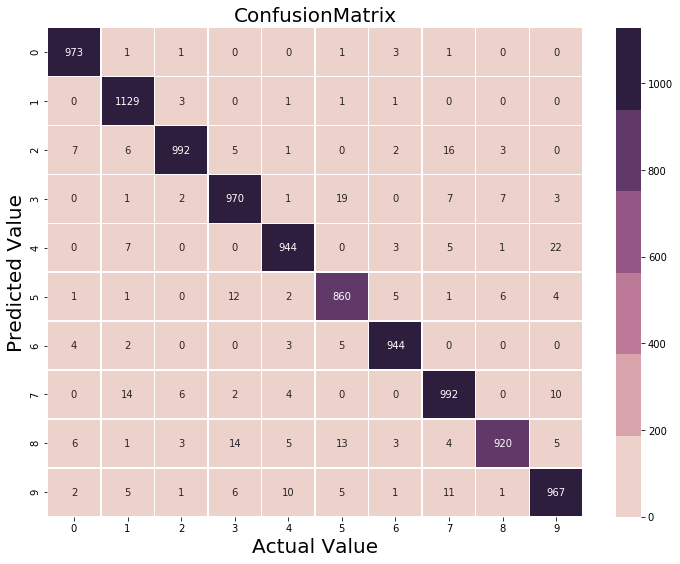

In [15]:
Q1_ConfusionMatrix = confusion_matrix(np.ravel(classLabels_Test), Q1predictions)
plot_confusion_matrix(Q1_ConfusionMatrix, title="Confusion Matrix for k=1")

In [16]:
print("Accuracy of 10000 test sample for k=1 is: {}%".format(np.sum(np.diagonal(Q1_ConfusionMatrix))*100/np.sum(Q1_ConfusionMatrix)))

Accuracy of 10000 test sample for k=1 is: 96.91%


In [63]:
print("Test error table for each digit:")
errorFromConfusionMatrix(Q1_ConfusionMatrix)

Test error table for each digit:


,Digit,Accuracy,Error
0,0,99.285714,0.714286
1,1,99.471366,0.528634
2,2,96.124031,3.875969
3,3,96.039604,3.960396
4,4,96.130346,3.869654
5,5,96.412556,3.587444
6,6,98.538622,1.461378
7,7,96.498054,3.501946
8,8,94.455852,5.544148
9,9,95.837463,4.162537


## Comments (Question 1):

1. k=1
2. Accuracy = 96.91% for 10000 test images.
3. Time of execution is around 615-650 seconds 
4. Accuracy of each digit is presented in report cell also.
5. Test error table for each digit is presented above:
    
   1. Digit 1 have minimum error followed by 0.
   2. Digit 8 have maximum error followed by 9.
   
6. Confusion matrix represented above give lot of information about the performance of classifier. 

   From the confusion matrix we can comment that:
   1. Digit 8 have maximum error, because that is predicted as 3(14 times) or 5(13 times).
   1. Digit 9 also have maximum error, because that is predicted as 4(10 times) or 7(11 times).
   3. Digit 7 can be predicted as 1.
   4. Digit 4 is predicted as 9(22 times).

# Question 2
Implement a KNN leave-one-out approach and test values of K from 1 to 20. Plot the leave-one-out error vs. K. Present the testing error for best value of K for each digit in a table. (If you are running into time problems using all 60,000 data points for leave-one-out, feel free to randomly sample the training set to estimate the best K.)

Note: For this question we have selected 2000 samples randomly.   

In [18]:
def Knn_LeaveOneOut(trainData, trainLabels, k):
    
    Knn_LeaveOneOut_predictions = np.zeros(trainLabels.shape)
    
    #Note down the start time 
    start_time = timeit.default_timer()
    
    for i in range(len(trainData)):
        test_point = trainData[i,:]
        train_data = np.vstack((trainData[:i],trainData[i+1:]))
        train_data_label = np.vstack((trainLabels[:i],trainLabels[i+1:]))
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(train_data, np.ravel(train_data_label))
        Knn_LeaveOneOut_predictions[i,0] = model.predict(np.array([test_point,]))
    
    #Note down the end time
    end_time = timeit.default_timer()
    
    #return report so user can save it for latter use
    report = classification_report(np.ravel(trainLabels), Knn_LeaveOneOut_predictions, output_dict = True)
    
    #save the confusion matrix
    confusionMatrix = confusion_matrix(np.ravel(trainLabels), Knn_LeaveOneOut_predictions)
    
    #error calculation in percentage
    error = (1-report['accuracy'])
    
    #calculate execution time
    execution_time = end_time - start_time
    
    return report, error, execution_time, confusionMatrix

In [19]:
SizeOfReducedTrainData = 2000
index = np.random.choice(imageData_Train.shape[0], SizeOfReducedTrainData, replace=False)
reduced_imageData_Train = imageData_Train[index,:]
reduced_classLabels_Train = classLabels_Train[index,:]

In [20]:
#reshape image data into (nImages, nPixels, nPixels)
imageData_Train_28into28 = reduced_imageData_Train.reshape(SizeOfReducedTrainData, nPixels, nPixels)

In [21]:
Q2_report_list = []
Q2_error_list = []
Q2_executiontime_list = []
Q2_ConfusionMatrix_list = []

Q2_kMax = 20

for k in range(1,Q2_kMax+1):    
    lReport, lError, lExecutionTime, lConfusionMatrix = Knn_LeaveOneOut(reduced_imageData_Train, reduced_classLabels_Train, k)
    Q2_report_list.append(lReport)
    Q2_error_list.append(lError)
    Q2_executiontime_list.append(lExecutionTime)
    Q2_ConfusionMatrix_list.append(lConfusionMatrix)

In [65]:
temparray = []
for k in range(0,Q2_kMax):    
    temparray.append([k+1, Q2_report_list[k]['accuracy'], Q2_error_list[k], Q2_executiontime_list[k]])
    
df = pd.DataFrame(temparray, range(Q2_kMax) ,['K', 'Accuracy', 'Error', 'Execution time'])
df   

,K,Accuracy,Error,Execution time
0,1,0.8985,0.1015,151.726338
1,2,0.8760,0.1240,150.200190
2,3,0.8960,0.1040,152.339950
3,4,0.8965,0.1035,150.892984
4,5,0.8970,0.1030,135.967459
5,6,0.8970,0.1030,134.477022
6,7,0.8970,0.1030,135.359472
7,8,0.8995,0.1005,136.258739
8,9,0.8955,0.1045,164.664618
9,10,0.8920,0.1080,151.172677


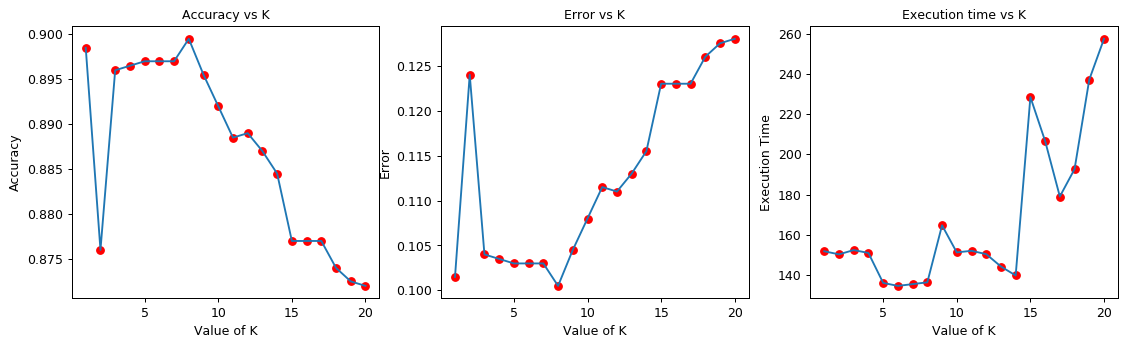

In [23]:
fig1 = plt.figure(1, figsize=(15, 4), dpi=90)

ax131 = fig1.add_subplot(131)
customPlot(ax131, [k+1 for k in range(0,Q2_kMax)], 
           [[Q2_report_list[k]['accuracy'] for k in range(0,Q2_kMax)]], 
           xlabel="Value of K", ylabel='Accuracy', \
           title='Accuracy vs K')

ax132 = fig1.add_subplot(132)
customPlot(ax132, [k+1 for k in range(0,Q2_kMax)], 
           [[Q2_error_list[k] for k in range(0,Q2_kMax)]], 
           xlabel="Value of K", ylabel='Error', \
           title='Error vs K')

ax133 = fig1.add_subplot(133)
customPlot(ax133, [k+1 for k in range(0,Q2_kMax)], 
           [[Q2_executiontime_list[k] for k in range(0,Q2_kMax)]], 
           xlabel="Value of K", ylabel='Execution Time', \
           title='Execution time vs K')

In [32]:
print("Minimum error is for K = {}".format(np.argmin(Q2_error_list)+1))
pd.DataFrame.from_dict(Q2_report_list[np.argmin(Q2_error_list)+1])

Minimum error is for K = 8


,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.928910,0.783394,0.967742,0.884422,0.887255,0.927711,0.928571,0.905213,0.957672,0.848958,0.8955,0.901985,0.900783
recall,0.970297,0.986364,0.797872,0.875622,0.928205,0.841530,0.957895,0.913876,0.830275,0.840206,0.8955,0.894214,0.895500
f1-score,0.949153,0.873239,0.874636,0.880000,0.907268,0.882521,0.943005,0.909524,0.889435,0.844560,0.8955,0.895334,0.895287
support,202.000000,220.000000,188.000000,201.000000,195.000000,183.000000,190.000000,209.000000,218.000000,194.000000,0.8955,2000.000000,2000.000000


In [66]:
print("Test error table for each digit when k={} :".format(np.argmin(Q2_error_list)+1))
errorFromConfusionMatrix(Q2_ConfusionMatrix_list[np.argmin(Q2_error_list)+1])

Test error table for each digit when k=8 :


,Digit,Accuracy,Error
0,0,97.029703,2.970297
1,1,98.636364,1.363636
2,2,79.787234,20.212766
3,3,87.562189,12.437811
4,4,92.820513,7.179487
5,5,84.153005,15.846995
6,6,95.789474,4.210526
7,7,91.387560,8.612440
8,8,83.027523,16.972477
9,9,84.020619,15.979381


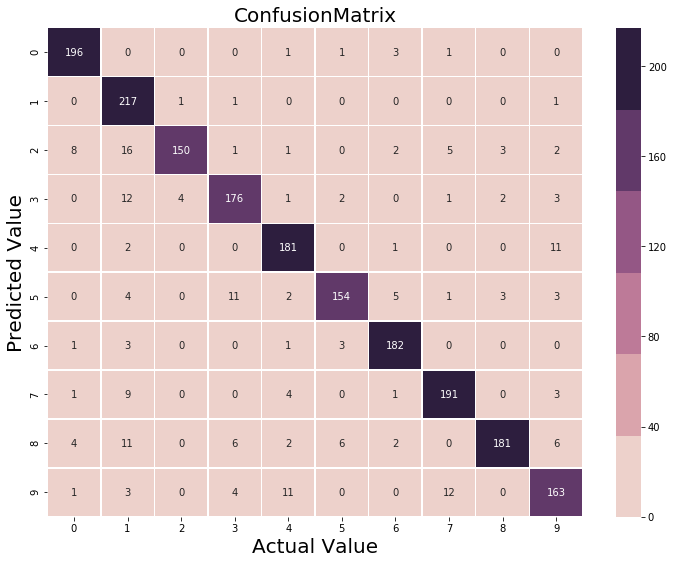

In [34]:
plot_confusion_matrix(Q2_ConfusionMatrix_list[np.argmin(Q2_error_list)+1], title="Confusion Matrix for k={}".format(np.argmin(Q2_error_list)+1))

## Comments (Question 2):

1. Test error for best value of k for each digit is presented in table (above confusion matrix). 
2. In general observation (refer the graphs and tables presented above) is accuracy is decreasing with increase in k. i.e. error is increasing with increase in k.
3. Accuracy in range of 86% to 90% is observed for all values of k.

# Question 3
Implement a function that downsamples the image by a factor of n. For example, if n is 4 then you will sample every 4th pixel (feature) in the 784-dimension feature vector. Repeat the KNN leave-one-out experiment with at least 4 different values of n. Comment on the testing results and the query time of the classifier.

Let's consider every 4th sample of 784-dimension feature vector and plot it.

Shape of image if every 4th pixel is considered:  (196,)


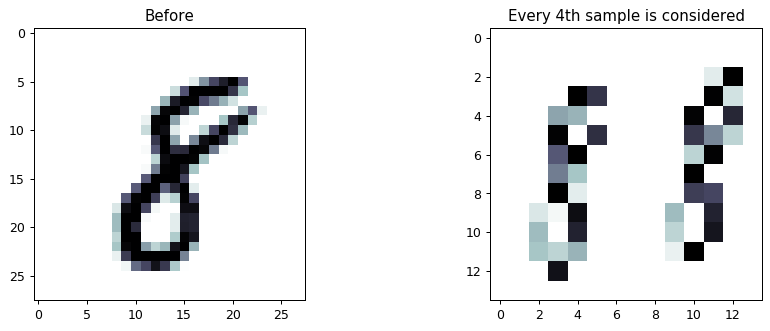

In [28]:
n = 4
downsampledMatrix1 = reduced_imageData_Train[0,::n]
print("Shape of image if every 4th pixel is considered: ", downsampledMatrix1.shape)

fig1 = plt.figure(1, figsize=(12, 4), dpi=90)

ax121 = fig1.add_subplot(121)
ax121.set_title('Before')
plt.imshow(imageData_Train_28into28[0,:,:],cmap = "bone_r")

ax122 = fig1.add_subplot(122)
ax122.set_title('Every 4th sample is considered')
plt.imshow(downsampledMatrix1.reshape(14,14),cmap = "bone_r")

plt.show()

In [29]:
#configuration parameters
n_List = [2,4,7,14]
Q3_kMax = 4

#Result variables
Q3_report_list = []
Q3_error_list = []
Q3_executiontime_list = []
Q3_ConfusionMatrix_list = []

for n in n_List:
    for k in range(1,Q3_kMax+1):
        lReport, lError, lExecutionTime, lConfusionMatrix = Knn_LeaveOneOut(reduced_imageData_Train[:,::n], reduced_classLabels_Train,k)
        Q3_report_list.append(lReport)
        Q3_error_list.append(lError)
        Q3_executiontime_list.append(lExecutionTime)
        Q3_ConfusionMatrix_list.append(lConfusionMatrix)

In [67]:
temparray = []
for n in range(len(n_List)):
    for k in range(0,Q3_kMax):
        temparray.append([n_List[n],k+1,Q3_report_list[n*Q3_kMax+k]['accuracy'], Q3_error_list[n*Q3_kMax+k], Q3_executiontime_list[n*Q3_kMax+k]])

df = pd.DataFrame(temparray, range(len(n_List)*Q3_kMax) ,['n = Downsampling factor', 'K', 'Accuracy', 'Error', 'Execution time'])
df

,n = Downsampling factor,K,Accuracy,Error,Execution time
0,2,1,0.8835,0.1165,108.974847
1,2,2,0.8680,0.1320,104.882264
2,2,3,0.8885,0.1115,85.591173
3,2,4,0.8890,0.1110,76.588247
4,4,1,0.8255,0.1745,41.398026
5,4,2,0.7970,0.2030,42.590100
6,4,3,0.8235,0.1765,42.086588
7,4,4,0.8170,0.1830,42.570356
8,7,1,0.7025,0.2975,33.018321
9,7,2,0.6855,0.3145,29.424215


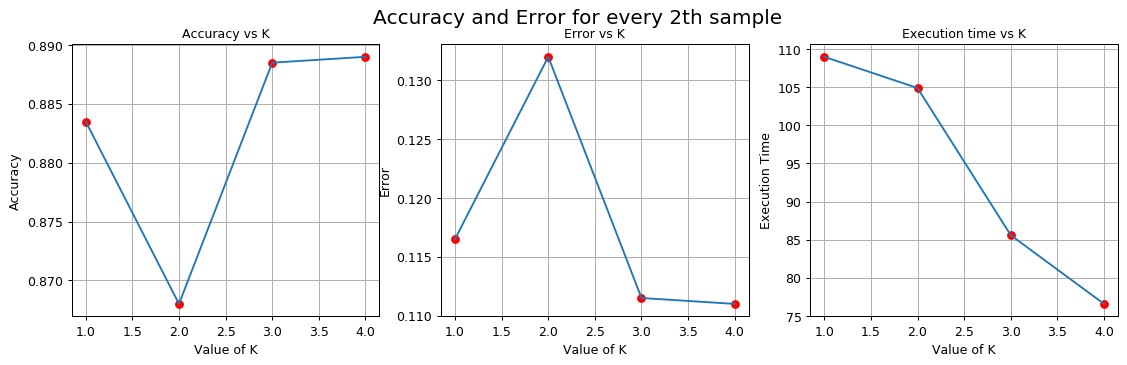

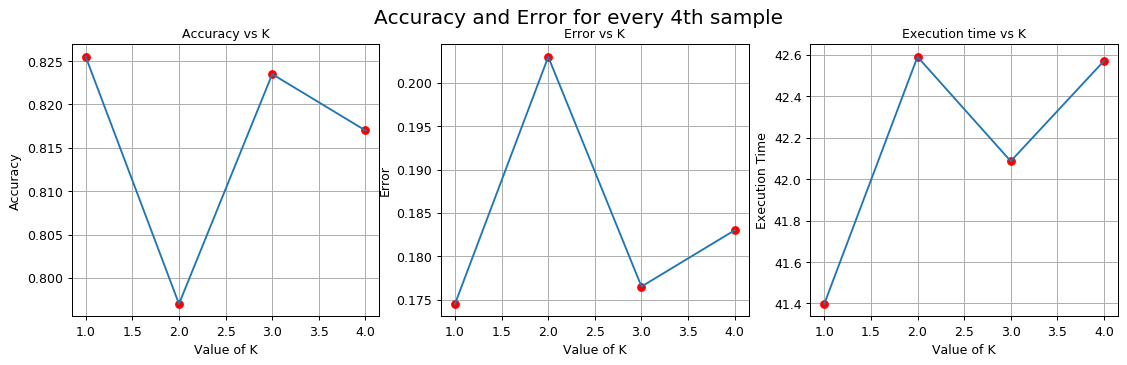

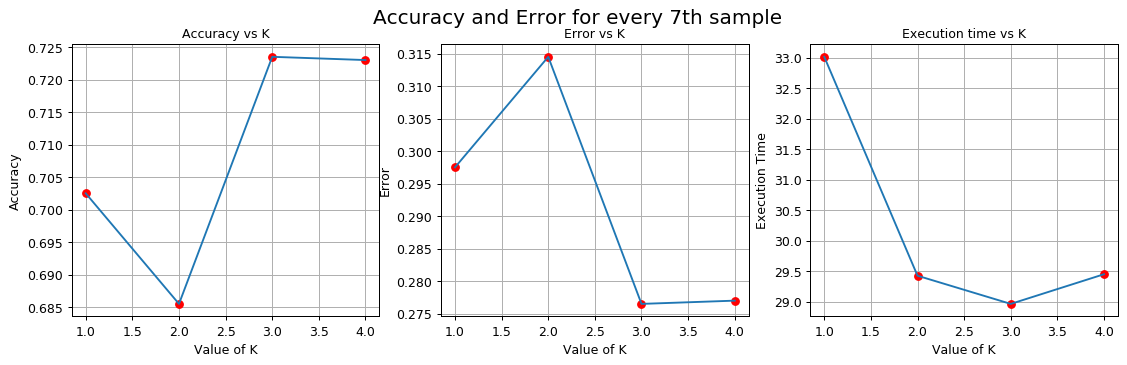

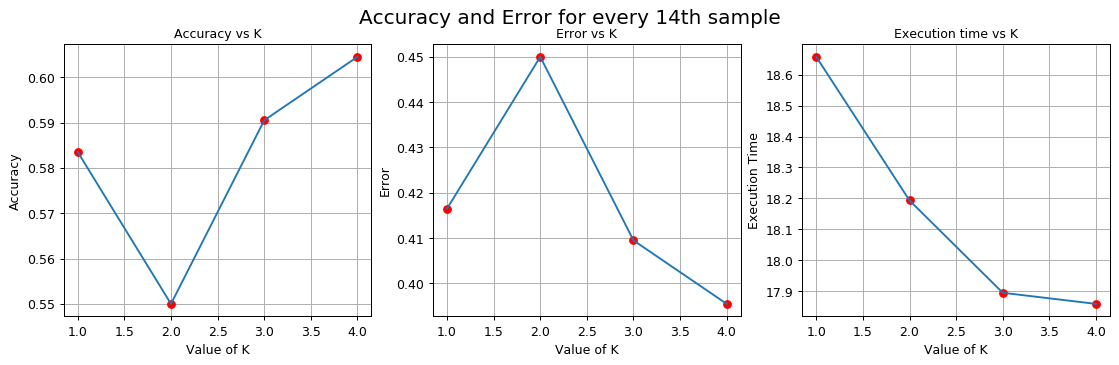

In [31]:
for n in range(len(n_List)):    
    
    fig1 = plt.figure(n, figsize=(15, 4), dpi=90)
    fig1.suptitle('Accuracy and Error for every {}th sample'.format(n_List[n]), fontsize=16)
    
    ax131 = fig1.add_subplot(131)
    customPlot(ax131, [k+1 for k in range(0,Q3_kMax)], 
               [[Q3_report_list[n*Q3_kMax+k]['accuracy'] for k in range(0,Q3_kMax)]], 
               xlabel="Value of K", ylabel='Accuracy', \
               title='Accuracy vs K', grid='on')
    
    ax132 = fig1.add_subplot(132)
    customPlot(ax132, [k+1 for k in range(0,Q3_kMax)], 
               [[Q3_error_list[n*Q3_kMax+k] for k in range(0,Q3_kMax)]], 
               xlabel="Value of K", ylabel='Error', \
               title='Error vs K', grid='on')
    
    ax133 = fig1.add_subplot(133)
    customPlot(ax133, [k+1 for k in range(0,Q3_kMax)], 
               [[Q3_executiontime_list[n*Q3_kMax+k] for k in range(0,Q3_kMax)]], 
               xlabel="Value of K", ylabel='Execution Time', \
               title='Execution time vs K', grid='on')

## Comments (Question 3):

1. Observations are take for downsampling factor n = 2,4,7,14, i.e. every 2nd, 4th, 7th, and 14th sample considered.
2. knn classification value with k=[1,2,3,4,]
3. After downsampling size of the feature vector is reduced hence time of execution of KNN leave-one-out is reduced for larger value of n. i.e. ExecutionTime(n=14) [in range of 12 to 15 seconds] < ExecutionTime(n=2) [in range of 55 to 65 seconds]

Querry time of the classifier decreases for larger value of sampling factor as size of feature vector gets reduced hence the overall execution time including distance calculation and search.

4. Overall for different value of k, n=2 gives best accuracy and least error in comparison to other n whereas n=14 have least accuracy. Refer table and graphs.
5. In addition to table, Plots of accuracy, error, and execution are provided above for different value of sampling factor(n).

# Question 4
Implement a function that smart downsamples the image by binning nearby pixels. For example, if n is 4 then the 28x28 image will be binned down to a 7x7 image by summing each 4x4 block in the image. Repeat the KNN leave-one-out experiment with at least 4 different values of n. Comment on the testing results and the query time of the classifier.

In [35]:
def smartDownSampler(dataset, downsampleFactor, binning=None):
    '''Downsaple image of nPixels*nPixels by downsampleFactor i.e. into (nPixels/downsampleFactor)*(nPixels/downsampleFactor)'''
    
    #shape of the data set shall be 28*28 always i.e.nPixels*nPixels 
    #print(dataset.shape)
    
    downsampledMatrix_row = int(nPixels/downsampleFactor)
    downsampledMatrix_column = int(nPixels/downsampleFactor)
    downsampledMatrix = np.zeros((downsampledMatrix_row, downsampledMatrix_column))

    for row in range(downsampledMatrix_row):
        for column in range(downsampledMatrix_column):
            MatrixK = dataset[downsampleFactor*(row):downsampleFactor*(row+1),downsampleFactor*(column):downsampleFactor*(column+1)]
            if binning is None:
                downsampledMatrix[row, column] = MatrixK.sum()
            elif binning is 'max':
                downsampledMatrix[row, column] = MatrixK.max()
    
    return downsampledMatrix

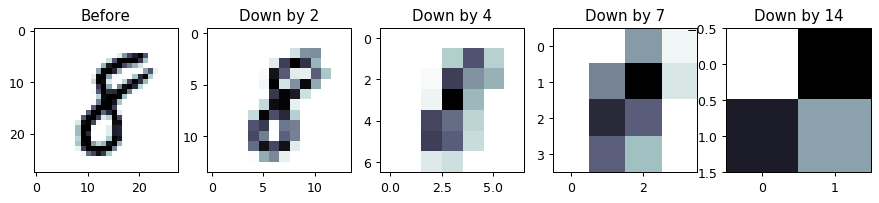

In [36]:
downsampleFactor1 = 2
downsampledMatrix1 = smartDownSampler(imageData_Train_28into28[0,:,:] , downsampleFactor1)

downsampleFactor1 = 4
downsampledMatrix2 = smartDownSampler(imageData_Train_28into28[0,:,:] , downsampleFactor1)

downsampleFactor1 = 7
downsampledMatrix3 = smartDownSampler(imageData_Train_28into28[0,:,:] , downsampleFactor1)

downsampleFactor1 = 14
downsampledMatrix4 = smartDownSampler(imageData_Train_28into28[0,:,:] , downsampleFactor1)

#print("Down sampled matrix is:\n", downsampledMatrix1, "\nDown sampled matrix shape: ",downsampledMatrix1.shape)

fig1 = plt.figure(1, figsize=(12, 4), dpi=90)
ax151 = fig1.add_subplot(151)
ax151.set_title('Before')
plt.imshow(imageData_Train_28into28[0,:,:],cmap = "bone_r")

ax152 = fig1.add_subplot(152)
ax152.set_title('Down by 2')
plt.imshow(downsampledMatrix1,cmap = "bone_r")

ax153 = fig1.add_subplot(153)
ax153.set_title('Down by 4')
plt.imshow(downsampledMatrix2,cmap = "bone_r")

ax154 = fig1.add_subplot(154)
ax154.set_title('Down by 7')
plt.imshow(downsampledMatrix3,cmap = "bone_r")

ax155 = fig1.add_subplot(155)
ax155.set_title('Down by 14')
plt.imshow(downsampledMatrix4,cmap = "bone_r")

plt.show()

In [37]:
#configuration parameters
#downsampling factor list
Q4_downsampleFactor_list = [2, 4, 7, 14]
Q4_kMax = 5

#Result variables
Q4_report_list = []
Q4_error_list = []
Q4_executiontime_list = []
Q4_ConfusionMatrix_list = []

for Q4downsampleFactor in Q4_downsampleFactor_list:
    sampledImageData = np.zeros((imageData_Train_28into28.shape[0], int(nPixels/Q4downsampleFactor), int(nPixels/Q4downsampleFactor)))
    #print(Q4downsampleFactor, sampledImageData.shape)
    for image_n in range(imageData_Train_28into28.shape[0]):
        sampledImageData[image_n] = smartDownSampler(imageData_Train_28into28[image_n,:,:], Q4downsampleFactor)
    
    #reshape
    sampledImageData_Reshaped = sampledImageData.reshape(imageData_Train_28into28.shape[0], int(nPixels/Q4downsampleFactor)**2)
    #print(Q4downsampleFactor, sampledImageData_Reshaped.shape)
    
    for k in range(1,Q4_kMax+1):
        lReport, lError, lExecutionTime, lConfusionMatrix = Knn_LeaveOneOut(sampledImageData_Reshaped, reduced_classLabels_Train,k)
        Q4_report_list.append(lReport)
        Q4_error_list.append(lError)
        Q4_executiontime_list.append(lExecutionTime)
        Q4_ConfusionMatrix_list.append(lConfusionMatrix)

In [68]:
temparray = []

for n in range(len(Q4_downsampleFactor_list)):
    for k in range(0,Q4_kMax):
        temparray.append([Q4_downsampleFactor_list[n],k+1,Q4_report_list[n*Q4_kMax+k]['accuracy'], Q4_error_list[n*Q4_kMax+k], Q4_executiontime_list[n*Q4_kMax+k]])
        
df = pd.DataFrame(temparray, range(len(Q4_downsampleFactor_list)*Q4_kMax) ,['n = Downsampling factor', 'K', 'Accuracy', 'Error', 'Execution time'])
df      

,n = Downsampling factor,K,Accuracy,Error,Execution time
0,2,1,0.9060,0.0940,44.812699
1,2,2,0.8885,0.1115,45.398780
2,2,3,0.9095,0.0905,44.593431
3,2,4,0.9040,0.0960,44.991607
4,2,5,0.9070,0.0930,45.350019
5,4,1,0.8805,0.1195,9.056342
6,4,2,0.8650,0.1350,9.379016
7,4,3,0.8820,0.1180,9.208552
8,4,4,0.8805,0.1195,9.193716
9,4,5,0.8870,0.1130,9.371146


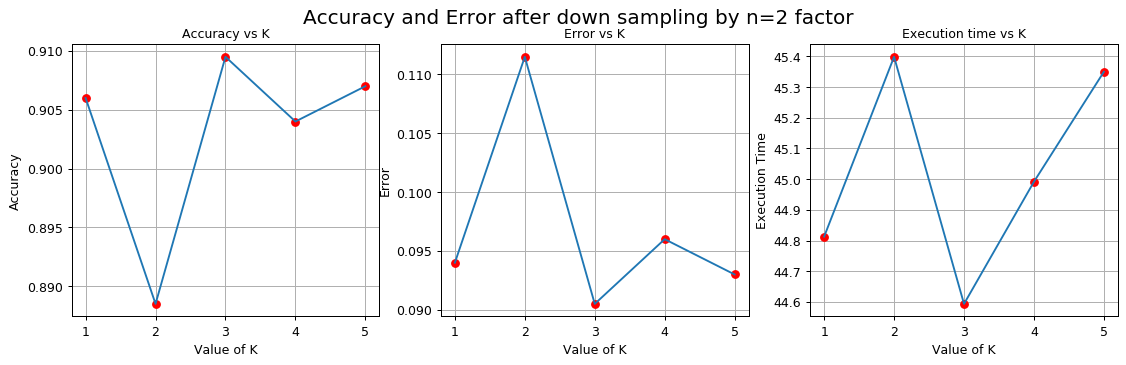

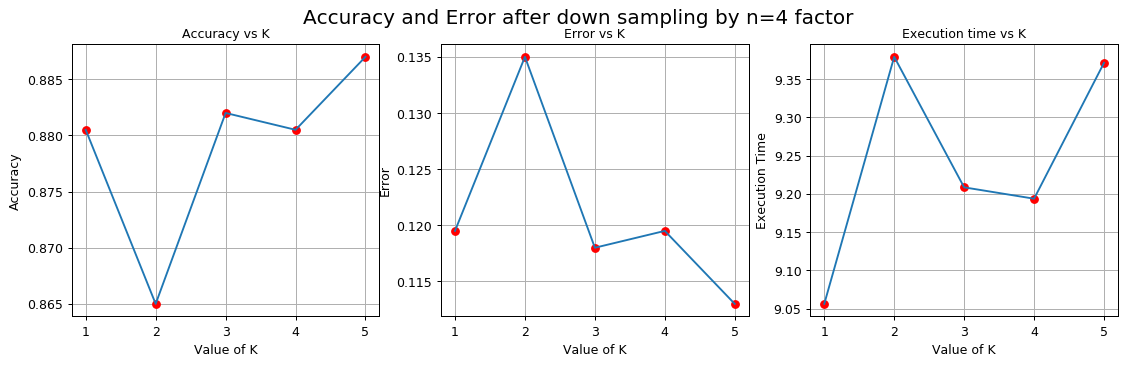

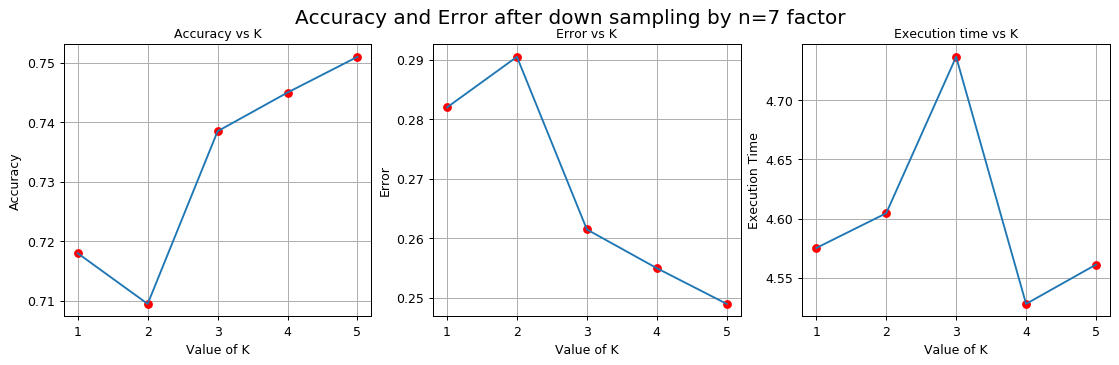

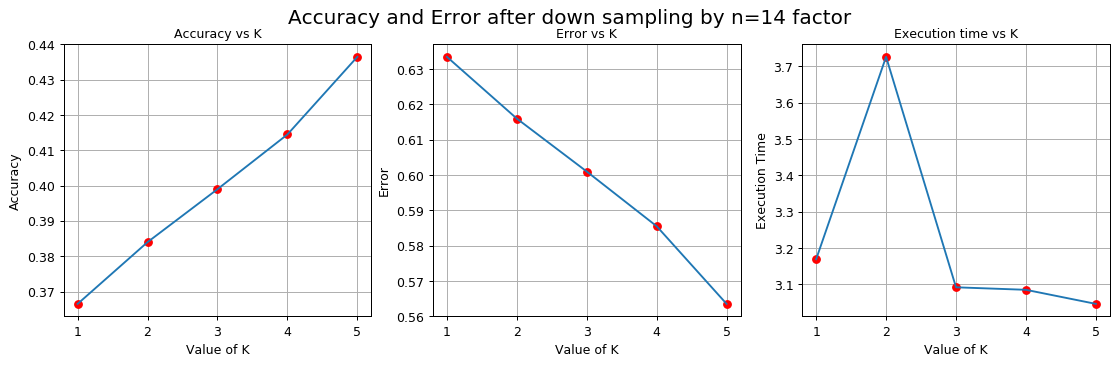

In [39]:
for n in range(len(Q4_downsampleFactor_list)):    
    
    fig1 = plt.figure(n, figsize=(15, 4), dpi=90)
    fig1.suptitle('Accuracy and Error after down sampling by n={} factor'.format(Q4_downsampleFactor_list[n]), fontsize=16)
    
    ax131 = fig1.add_subplot(131)
    customPlot(ax131, [k+1 for k in range(0,Q4_kMax)], 
               [[Q4_report_list[n*Q4_kMax+k]['accuracy'] for k in range(0,Q4_kMax)]], 
               xlabel="Value of K", ylabel='Accuracy', \
               title='Accuracy vs K', grid='on')
    
    ax132 = fig1.add_subplot(132)
    customPlot(ax132, [k+1 for k in range(0,Q4_kMax)], 
               [[Q4_error_list[n*Q4_kMax+k] for k in range(0,Q4_kMax)]], 
               xlabel="Value of K", ylabel='Error', \
               title='Error vs K', grid='on')
    
    ax133 = fig1.add_subplot(133)
    customPlot(ax133, [k+1 for k in range(0,Q4_kMax)], 
               [[Q4_executiontime_list[n*Q4_kMax+k] for k in range(0,Q4_kMax)]], 
               xlabel="Value of K", ylabel='Execution Time', \
               title='Execution time vs K', grid='on')

## Comments (Question 4):

1. Observations are taken for downsampling factor n = 2,4,7,14.
<b>smartDownSampler</b> is implemented to downsample image size. Images are displayed after down sampling above. 

2. knn classification value with k=[1,2,3,4,5]
3. After downsampling size of the feature vector is reduced hence time of execution of KNN leave-one-out is reduced for larger value of n. i.e. ExecutionTime(n=14) [in range of 2.2 to 2.3 seconds] < ExecutionTime(n=2) [in range of 30 to 45 seconds]

    Querry time of the classifier decreases for larger value of sampling factor as size of feature vector gets reduced hence the overall execution time including distance calculation and search.
    

4. Overall for different value of k, n=2 gives best accuracy(around 90%) and least error in comparison to other n whereas n=14 have least accuracy (around 40%). Refer table and graphs.

    It's observed that for n=14, accuracy increases with increasing value of k. i.e. for increasing downsampling factor increase in k can give more accurate result.
    

5. In addition to the table, Plots of accuracy, error, and execution are provided above for different value of sampling factor(n).

# Question 5
Run your smart downsampler at n = 28. Essentially, reduce each image down to 1 pixel by summing them all. The motivation here is that an '8' will obviously have more dark pixels than a '1' . Repeat the KNN leave-one-out experiment. Comment on the testing results and the query time of the classifier.

In [40]:
#configuration parameters
Q5_kMax = 7

#Result variables
Q5_report_list = []
Q5_error_list = []
Q5_executiontime_list = []
Q5_ConfusionMatrix_list = []

Q5downsampleFactor = 28

sampledImageData = np.zeros((imageData_Train_28into28.shape[0], int(nPixels/Q5downsampleFactor), int(nPixels/Q5downsampleFactor)))
#print(Q5downsampleFactor, sampledImageData.shape)

for image_n in range(imageData_Train_28into28.shape[0]):
    sampledImageData[image_n] = smartDownSampler(imageData_Train_28into28[image_n,:,:], Q5downsampleFactor)
    
#reshape
sampledImageData_Reshaped = sampledImageData.reshape(imageData_Train_28into28.shape[0], int(nPixels/Q5downsampleFactor)**2)
#print(Q5downsampleFactor, sampledImageData_Reshaped.shape)
    
for k in range(1,Q5_kMax+1):
    lReport, lError, lExecutionTime, lConfusionMatrix = Knn_LeaveOneOut(sampledImageData_Reshaped, reduced_classLabels_Train,k)
    Q5_report_list.append(lReport)
    Q5_error_list.append(lError)
    Q5_executiontime_list.append(lExecutionTime)
    Q5_ConfusionMatrix_list.append(lConfusionMatrix)

In [69]:
temparray = []

for k in range(0,Q5_kMax):    
    temparray.append([k+1, Q5_report_list[k]['accuracy'], Q5_error_list[k], Q5_executiontime_list[k]])
            
df = pd.DataFrame(temparray, range(Q5_kMax) ,['K', 'Accuracy', 'Error', 'Execution time'])
df           

,K,Accuracy,Error,Execution time
0,1,0.1615,0.8385,3.112474
1,2,0.1805,0.8195,3.386926
2,3,0.1850,0.8150,3.510840
3,4,0.1810,0.8190,4.253343
4,5,0.1805,0.8195,3.736223
5,6,0.1815,0.8185,3.219438
6,7,0.1875,0.8125,3.175905


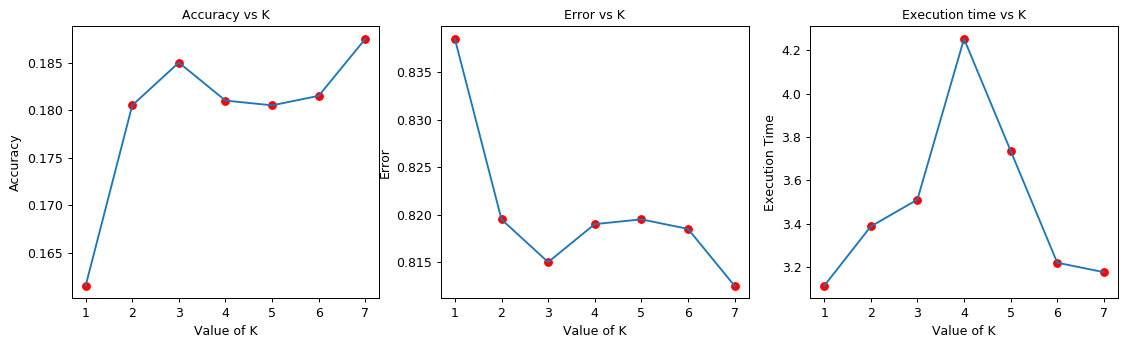

In [42]:
fig1 = plt.figure(1, figsize=(15, 4), dpi=90)

ax131 = fig1.add_subplot(131)
customPlot(ax131, [k+1 for k in range(0,Q5_kMax)], 
           [[Q5_report_list[k]['accuracy'] for k in range(0,Q5_kMax)]], 
           xlabel="Value of K", ylabel='Accuracy', \
           title='Accuracy vs K')

ax132 = fig1.add_subplot(132)
customPlot(ax132, [k+1 for k in range(0,Q5_kMax)], 
           [[Q5_error_list[k] for k in range(0,Q5_kMax)]], 
           xlabel="Value of K", ylabel='Error', \
           title='Error vs K')

ax133 = fig1.add_subplot(133)
customPlot(ax133, [k+1 for k in range(0,Q5_kMax)], 
           [[Q5_executiontime_list[k] for k in range(0,Q5_kMax)]], 
           xlabel="Value of K", ylabel='Execution Time', \
           title='Execution time vs K')

## Comments (Question 5):

1. This question is similar to previous question except that image reduced to single value. i.e sum of all 784 vectors.  

2. knn classification value with k=[1,2,3,4,5,6,7]

3. Leave-one-out execution time of the classifier decreased to 2 to 4 seconds for larger value of sampling factor = 28, as size of feature vector gets reduced to 1 hence the overall execution time including distance calculation and search.
   Querry time for new samples will also get reduced.
   
4. But accuracy of this classifier is too low i.e around 15% to 20%. We can not use this in real applications.    

5. For n=28, Classifier performs well (i.e. less error) for larger value of k.

5. In addition to the table, Plots of accuracy, error, and execution are provided above for sampling factor(n) = 28.

# Question 6
Do a little research of your own and develop a feature transformation method that you then use with the KNN leave-one-out experiment. Describe your method in detail, using equations and figures as necessary. Someone should be able to reproduce your results with your description. Comment on the testing results and the query time of the classifier.

## Method 1: Down sampling Max of (n * n) matrix  

As we observed in above examples, having larger feature vector make classification computationally expensive.

Objective of this(method 1) experiment to analyze the effect of downsampling on execution time as well as max pooling for different value of n.

For question 4, we considered sum of each block of (n * n) but in this method we will be considering MAX of each n * n matrix.

In this method, smart downssaple function implemented for question 4 is reused.

![](Pooling.png)

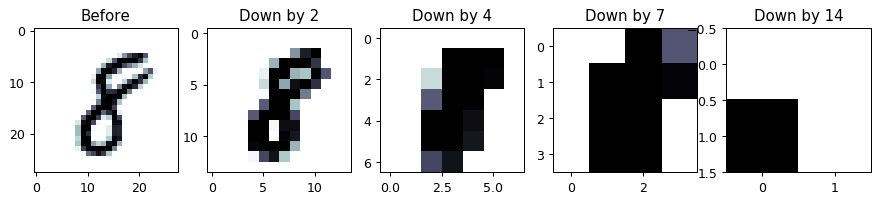

In [43]:
Q6downsampleFactor1 = 2
downsampledMatrix1 = smartDownSampler(imageData_Train_28into28[0,:,:] , Q6downsampleFactor1, binning='max')

Q6downsampleFactor1 = 4
downsampledMatrix2 = smartDownSampler(imageData_Train_28into28[0,:,:] , Q6downsampleFactor1, binning='max')

Q6downsampleFactor1 = 7
downsampledMatrix3 = smartDownSampler(imageData_Train_28into28[0,:,:] , Q6downsampleFactor1, binning='max')

Q6downsampleFactor1 = 14
downsampledMatrix4 = smartDownSampler(imageData_Train_28into28[0,:,:] , Q6downsampleFactor1, binning='max')

fig1 = plt.figure(1, figsize=(12, 4), dpi=90)
ax151 = fig1.add_subplot(151)
ax151.set_title('Before')
plt.imshow(imageData_Train_28into28[0,:,:],cmap = "bone_r")

ax152 = fig1.add_subplot(152)
ax152.set_title('Down by 2')
plt.imshow(downsampledMatrix1,cmap = "bone_r")

ax153 = fig1.add_subplot(153)
ax153.set_title('Down by 4')
plt.imshow(downsampledMatrix2,cmap = "bone_r")

ax154 = fig1.add_subplot(154)
ax154.set_title('Down by 7')
plt.imshow(downsampledMatrix3,cmap = "bone_r")

ax155 = fig1.add_subplot(155)
ax155.set_title('Down by 14')
plt.imshow(downsampledMatrix4,cmap = "bone_r")

plt.show()

In [44]:
#configuration parameters
#downsampling factor list
Q6_downsampleFactor_list = [2, 4, 7, 14]
Q6_kMax = 5

#Result variables
Q6_report_list = []
Q6_error_list = []
Q6_executiontime_list = []
Q6_ConfusionMatrix_list = []

for Q6downsampleFactor in Q6_downsampleFactor_list:
    sampledImageData = np.zeros((imageData_Train_28into28.shape[0], int(nPixels/Q6downsampleFactor), int(nPixels/Q6downsampleFactor)))
    #print(Q6downsampleFactor, sampledImageData.shape)
    for image_n in range(imageData_Train_28into28.shape[0]):
        sampledImageData[image_n] = smartDownSampler(imageData_Train_28into28[image_n,:,:], Q6downsampleFactor, binning='max')
    
    #reshape
    sampledImageData_Reshaped = sampledImageData.reshape(imageData_Train_28into28.shape[0], int(nPixels/Q6downsampleFactor)**2)
    #print(Q6downsampleFactor, sampledImageData_Reshaped.shape)
    
    for k in range(1,Q6_kMax+1):
        lReport, lError, lExecutionTime, lConfusionMatrix = Knn_LeaveOneOut(sampledImageData_Reshaped, reduced_classLabels_Train,k)
        Q6_report_list.append(lReport)
        Q6_error_list.append(lError)
        Q6_executiontime_list.append(lExecutionTime)
        Q6_ConfusionMatrix_list.append(lConfusionMatrix)        

In [70]:
temparray = []

for n in range(len(Q6_downsampleFactor_list)):
    for k in range(0,Q6_kMax):
        temparray.append([Q6_downsampleFactor_list[n],k+1,Q6_report_list[n*Q6_kMax+k]['accuracy'], Q6_error_list[n*Q6_kMax+k], Q6_executiontime_list[n*Q6_kMax+k]])
        
df = pd.DataFrame(temparray, range(len(Q6_downsampleFactor_list)*Q6_kMax) ,['n = Downsampling factor', 'K', 'Accuracy', 'Error', 'Execution time'])
df               

,n = Downsampling factor,K,Accuracy,Error,Execution time
0,2,1,0.9060,0.0940,52.205837
1,2,2,0.8885,0.1115,51.399989
2,2,3,0.9095,0.0905,49.550122
3,2,4,0.9040,0.0960,49.360981
4,2,5,0.9070,0.0930,46.948012
5,4,1,0.8805,0.1195,8.562870
6,4,2,0.8650,0.1350,8.477650
7,4,3,0.8820,0.1180,8.685982
8,4,4,0.8805,0.1195,8.412846
9,4,5,0.8870,0.1130,8.634695


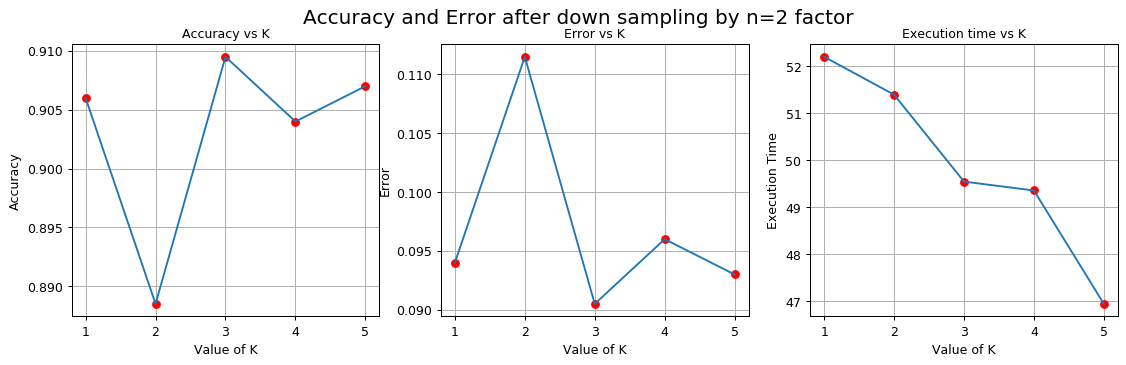

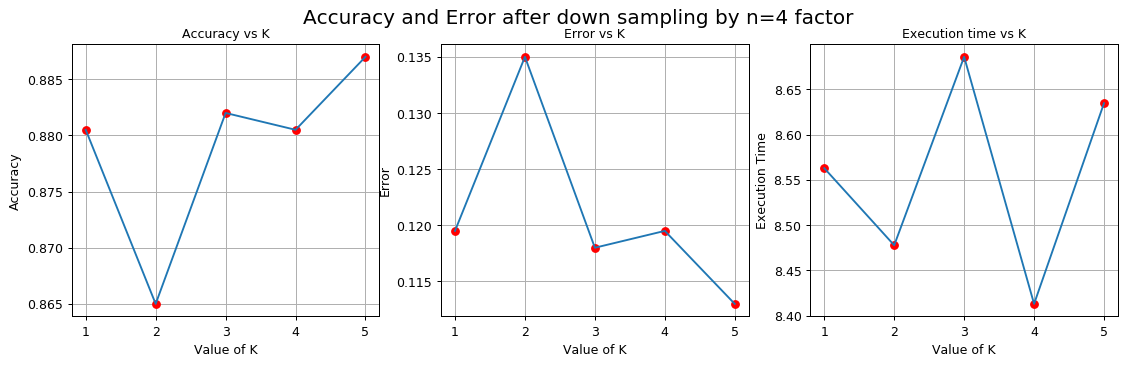

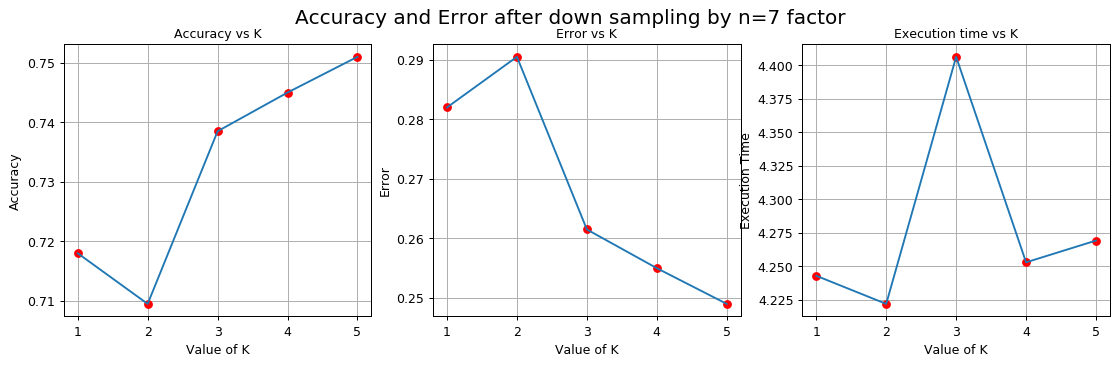

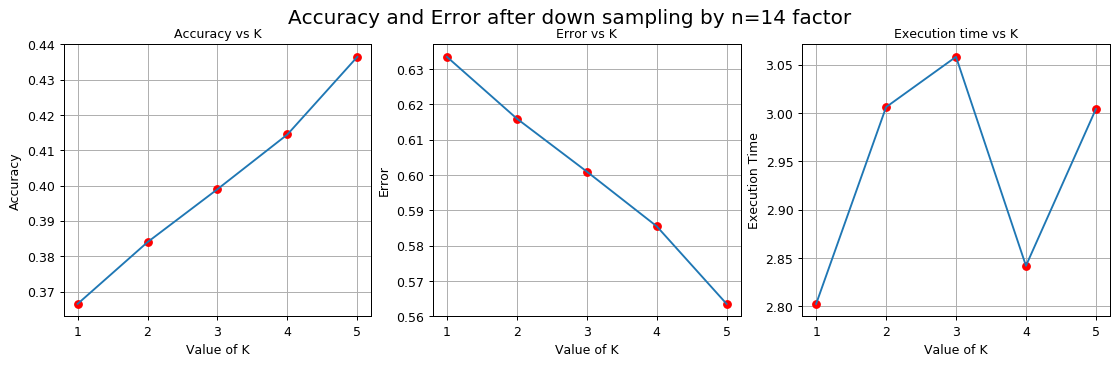

In [46]:
for n in range(len(Q6_downsampleFactor_list)):    
    
    fig1 = plt.figure(n, figsize=(15, 4), dpi=90)
    fig1.suptitle('Accuracy and Error after down sampling by n={} factor'.format(Q6_downsampleFactor_list[n]), fontsize=16)
    
    ax131 = fig1.add_subplot(131)
    customPlot(ax131, [k+1 for k in range(0,Q6_kMax)], 
               [[Q6_report_list[n*Q6_kMax+k]['accuracy'] for k in range(0,Q6_kMax)]], 
               xlabel="Value of K", ylabel='Accuracy', \
               title='Accuracy vs K', grid='on')
    
    ax132 = fig1.add_subplot(132)
    customPlot(ax132, [k+1 for k in range(0,Q6_kMax)], 
               [[Q6_error_list[n*Q6_kMax+k] for k in range(0,Q6_kMax)]], 
               xlabel="Value of K", ylabel='Error', \
               title='Error vs K', grid='on')
    
    ax133 = fig1.add_subplot(133)
    customPlot(ax133, [k+1 for k in range(0,Q6_kMax)], 
               [[Q6_executiontime_list[n*Q6_kMax+k] for k in range(0,Q6_kMax)]], 
               xlabel="Value of K", ylabel='Execution Time', \
               title='Execution time vs K', grid='on')

### Comments (Method 1):

1. Observations are taken for downsampling factor n = 2,4,7,14.
<b>smartDownSampler</b> is implemented to downsample image size. Images are displayed after down sampling above. 

2. knn classification value with k=[1,2,3,4,5]
3. After downsampling size of the feature vector is reduced hence time of execution of KNN leave-one-out is reduced for larger value of n. i.e. ExecutionTime(n=14) [in range of 2.2 to 2.5 seconds] < ExecutionTime(n=2) [in range of 30 to 45 seconds]

    Querry time of the classifier decreases for larger value of sampling factor as size of feature vector gets reduced hence the overall execution time including distance calculation and search.
    

4. Overall for different value of k, n=2 gives best accuracy(around 90%) and least error in comparison to other n whereas n=14 have least accuracy (around 40%). Refer table and graphs.

    It's observed that for n=14, accuracy increases with increasing value of k. i.e. for increasing downsampling factor increase in k can give more accurate result.
    

5. In addition to the table, Plots of accuracy, error, and execution are provided above for different value of sampling factor(n).

There are no major advantages observed over sum we performed in Question 4.

## Method 2: Principle Component Analysis

Principle Component Analysis (PCA) attempts to transform the data into a set of orthogonal variables that linearly combine to represent each set of features. Much like Singular Value Decomposition, the algorithm finds the principle components with the largest contribution to the dataset first. In this case, each PCA component can be thought of as providing a specific amount of variance to the image. 

One huge advantage that PCA provides is dimension reduction - by reducing the dimensionality of the dataset, it is possible to speed up and improve the process of KNN.

A sensitivity study with a range of values of k and PCA components was performed using a small subset of the total training data (2000 points). From this, 30 components with k=1 was selected as the model parameters. 

One neat aspect of PCA is that you can view the PCA components as "images" and see what shapes make up the most variance in the dataset.

Although we didn't see an improvement in classification performance with our given parameters, there was a huge boost in time to run the model (~16 vs ~600 seconds for the original k=1 run) with no degradation in classification performance.

Comparing the confusion matrix with Question 1, it can be seen that the results are almost identical in terms of performance.

In [47]:
print(imageData_Train.shape)
imageDataPCA = imageData_Train[:10000,:]
print(imageDataPCA.shape)

(60000, 784)
(10000, 784)


In [48]:
from sklearn.decomposition import PCA
imageDataPCA = imageData_Train[:2000,:]
classLabelsPCA = classLabels_Train[:2000,:]
nC = [5,10,20,25,30,50]
errorcount = np.zeros((6,3))

for ii in range(len(nC)):
    pca = PCA(n_components=nC[ii])
    pcaReduced = pca.fit(imageDataPCA).transform(imageDataPCA)
    pcaReport, pcaError, pcaExecutionTime, pcaConfusionMatrix = Knn_LeaveOneOut(pcaReduced, classLabelsPCA,1)
    errorcount[ii,0] = pcaError
    pcaReport, pcaError, pcaExecutionTime, pcaConfusionMatrix = Knn_LeaveOneOut(pcaReduced, classLabelsPCA,3)
    errorcount[ii,1] = pcaError
    pcaReport, pcaError, pcaExecutionTime, pcaConfusionMatrix = Knn_LeaveOneOut(pcaReduced, classLabelsPCA,5)
    errorcount[ii,2] = pcaError

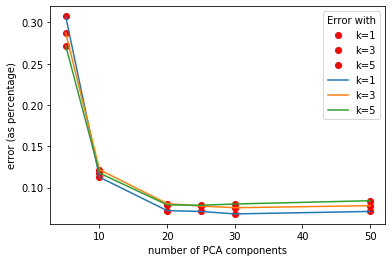

[[0.3075 0.2875 0.272 ]
 [0.1125 0.1215 0.1175]
 [0.072  0.0805 0.079 ]
 [0.071  0.0775 0.0785]
 [0.068  0.0755 0.08  ]
 [0.071  0.078  0.084 ]]


In [49]:
fig, ax = plt.subplots()
ax.plot(nC,errorcount[:,0],'ro',label='k=1')
ax.plot(nC,errorcount[:,1],'ro',label='k=3')
ax.plot(nC,errorcount[:,2],'ro',label='k=5')
ax.plot(nC,errorcount[:,0],label='k=1')
ax.plot(nC,errorcount[:,1],label='k=3')
ax.plot(nC,errorcount[:,2],label='k=5')
plt.legend(title='Error with')
plt.xlabel('number of PCA components')
plt.ylabel('error (as percentage)')
plt.show()
print(errorcount)

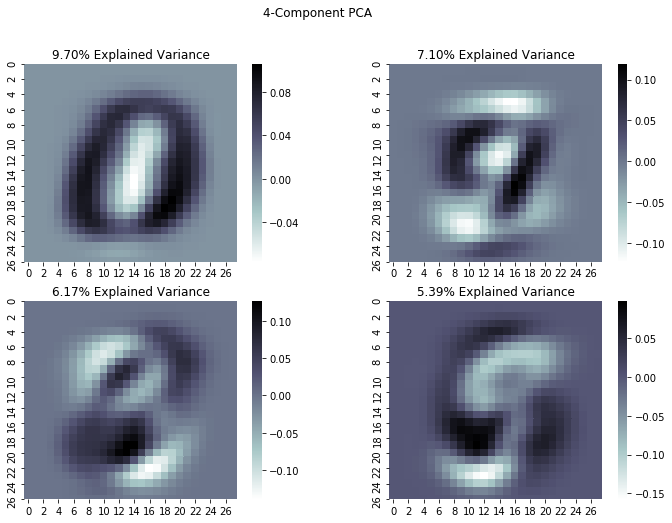

In [50]:
pca = PCA(n_components=30)
pcaReduced = pca.fit(imageData_Train).transform(imageData_Train)

fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

sns.heatmap(pca.components_[0, :].reshape(28, 28), ax=axarr[0][0], cmap='bone_r')
sns.heatmap(pca.components_[1, :].reshape(28, 28), ax=axarr[0][1], cmap='bone_r')
sns.heatmap(pca.components_[2, :].reshape(28, 28), ax=axarr[1][0], cmap='bone_r')
sns.heatmap(pca.components_[3, :].reshape(28, 28), ax=axarr[1][1], cmap='bone_r')

axarr[0][0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100),
    fontsize=12
)
axarr[0][1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100),
    fontsize=12
)
axarr[1][0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[2]*100),
    fontsize=12
)
axarr[1][1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[3]*100),
    fontsize=12
)
axarr[0][0].set_aspect('equal')
axarr[0][1].set_aspect('equal')
axarr[1][0].set_aspect('equal')
axarr[1][1].set_aspect('equal')

plt.suptitle('4-Component PCA')
pass

In [51]:
start_time = timeit.default_timer()
pca = PCA(n_components=30)
pcaReducedTrain = pca.fit(imageData_Train).transform(imageData_Train)
pcaReducedTest = pca.transform(imageData_Test)


model = KNeighborsClassifier(n_neighbors=1)

model.fit(pcaReduced, np.ravel(classLabels_Train))
PCApredictions = model.predict(pcaReducedTest)

print("EVALUATION ON TESTING DATA")
PCA_Report = classification_report(np.ravel(classLabels_Test), PCApredictions)
print(PCA_Report)

end_time = timeit.default_timer()

print('Duration of execution: {}'.format(end_time - start_time))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.95      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.96      0.97      0.96       892
           6       0.98      0.99      0.99       958
           7       0.97      0.96      0.96      1028
           8       0.97      0.96      0.97       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Duration of execution: 15.833559400000013


In [52]:
print("EVALUATION ON TESTING DATA")
PCA_Report = classification_report(np.ravel(classLabels_Test), PCApredictions)
print(PCA_Report)

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.95      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.96      0.97      0.96       892
           6       0.98      0.99      0.99       958
           7       0.97      0.96      0.96      1028
           8       0.97      0.96      0.97       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



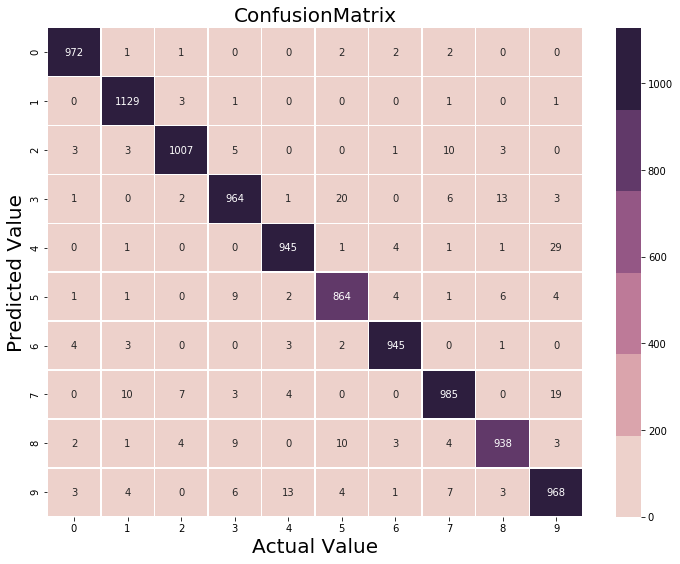

In [53]:
PCAConfusionMatrix = confusion_matrix(np.ravel(classLabels_Test), PCApredictions)
plot_confusion_matrix(PCAConfusionMatrix, title="Confusion Matrix for PCA")

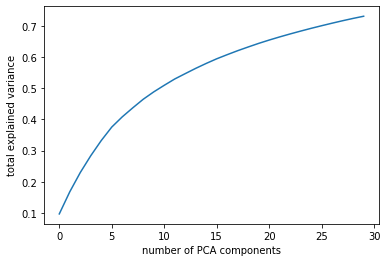

In [54]:
variances = np.cumsum(pca.explained_variance_ratio_)
pcas = list(range(30))

plt.plot(pcas,variances)
plt.xlabel('number of PCA components')
plt.ylabel('total explained variance')
plt.show()

## Method 3: Canny Edge Detection

Canny Edge Detection is an image processing technique that attempts to find edges in an image. To accomplish this, it applies a Gaussian filter to smooth the image and remove noise, finds intensity gradients, selects maximums, applies a threshold, and then uses a tracking method to discriminate edges that are connected from weak/fake edges.

Canny Edge Detection has a few parameters that  can be tuned to improve the process. The only parameter experimented with was the sigma value, which adjusts the width of the smoothing filter. We tried lowering it's size to supress less noise. Results of what this looks like can be seen below.

To accelerate the process, we first downsampled (intelligently) our images and selected only 1000 for the initial cross validation.

This method did not offer a runtime improvement. It also does not appear to offer classification performance improvement.

In [55]:
squareImageData = imageData_Train[:4000,:].reshape(-1,28,28)
imageData_Train2 = smartDownSampler(squareImageData,2)
print(imageData_Train2.shape)

(14, 14)


(14, 14)


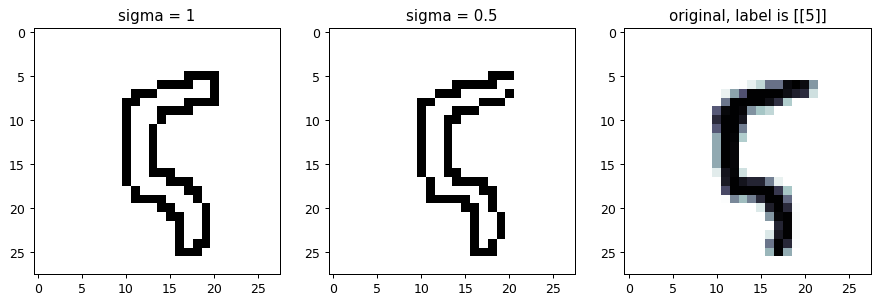

In [56]:
from skimage import feature

squareImageData = imageData_Train[:5000,:].reshape(-1,28,28)
cannyLabels = classLabels_Train[:5000]
imageData_Train2 = smartDownSampler(squareImageData,2)
print(imageData_Train2.shape)

edges1 = np.zeros(squareImageData.shape)
edges2 = np.zeros(squareImageData.shape)
for ii in range(squareImageData.shape[0]):
    edges1[ii,:,:] = feature.canny(squareImageData[ii,:,:])
    edges2[ii,:,:] = feature.canny(squareImageData[ii,:,:], sigma=0.5)

edges1V = edges1.reshape(-1,edges1.shape[1]**2)
edges2V = edges2.reshape(-1,edges2.shape[1]**2)
downsampledImageData = squareImageData.reshape(-1,squareImageData.shape[1]**2)

samplePoint = 100    
fig1 = plt.figure(1, figsize=(12, 4), dpi=90)
ax131 = fig1.add_subplot(131)    
ax131.set_title('sigma = 1')
plt.imshow(edges1[samplePoint,:,:],cmap = "bone_r")

ax132 = fig1.add_subplot(132)    
ax132.set_title('sigma = 0.5')
plt.imshow(edges2[samplePoint,:,:],cmap = "bone_r")

ax133 = fig1.add_subplot(133)    
ax133.set_title('original, label is {}'.format(classLabels_Train[samplePoint]))
plt.imshow(squareImageData[samplePoint,:,:],cmap = "bone_r")

plt.show()

In [ ]:
edgeReport, edgeError, edgeExecutionTime, edgeConfusionMatrix  = Knn_LeaveOneOut(edges1V, cannyLabels,1)
e11Error = edgeError

edgeReport, edgeError, edgeExecutionTime, edgeConfusionMatrix = Knn_LeaveOneOut(edges2V, cannyLabels,1)
e21Error = edgeError

edgeReport, edgeError, edgeExecutionTime, edgeConfusionMatrix = Knn_LeaveOneOut(edges1V, cannyLabels,3)
e13Error = edgeError

edgeReport, edgeError, edgeExecutionTime, edgeConfusionMatrix = Knn_LeaveOneOut(edges2V, cannyLabels,3)
e23Error = edgeError

edgeReport, edgeError, edgeExecutionTime, edgeConfusionMatrix = Knn_LeaveOneOut(edges1V, cannyLabels,5)
e15Error = edgeError

edgeReport, edgeError, edgeExecutionTime, edgeConfusionMatrix = Knn_LeaveOneOut(edges2V, cannyLabels,5)
e25Error = edgeError

edgeReport, edgeError, edgeExecutionTime, edgeConfusionMatrix = Knn_LeaveOneOut(edges1V, cannyLabels,7)
e17Error = edgeError

edgeReport, edgeError, edgeExecutionTime, edgeConfusionMatrix = Knn_LeaveOneOut(edges2V, cannyLabels,7)
e27Error = edgeError

print(e11Error)
print(e21Error)
print(e13Error)
print(e23Error)
print(e15Error)
print(e25Error)
print(e17Error)
print(e27Error)

In [ ]:
squareImageData = imageData_Train[:20000,:].reshape(-1,28,28)
cannyLabels = classLabels_Train[:20000]
imageData_Train2 = smartDownSampler(squareImageData,2)
edges1 = np.zeros(squareImageData.shape)
for ii in range(squareImageData.shape[0]):
    edges1[ii,:,:] = feature.canny(squareImageData[ii,:,:])
    
edges1V = edges1.reshape(-1,edges1.shape[1]**2)



model = KNeighborsClassifier(n_neighbors=1)

model.fit(edges1V, np.ravel(classLabels_Train[:30000]))
cannyPredictions = model.predict(imageData_Test)

print("EVALUATION ON TESTING DATA")
canny_Report = classification_report(np.ravel(classLabels_Test), Q1predictions)
print(canny_Report)